> ##### module import

In [1]:
import pandas as pd
import numpy as np

from prophet import Prophet

# import plotly.express as px

import pickle

from dateutil.parser import *

import warnings
warnings.filterwarnings('ignore')

> ##### Load data

In [2]:
filename = '../data/cdata.pickle'

## Load pickle
with open( filename,"rb") as fr:
    data = pickle.load(fr)
    
data

emp_user_id          user_ip req_type  system_seq  \
4        2018041340    172.10.122.14       RD           2   
5        2018041340    172.10.122.14       RD           2   
6        2018041340    172.10.122.14       RD           2   
7        2018041340    172.10.122.14       RD           2   
8        2018041340    172.10.122.14       RD           2   
...             ...              ...      ...         ...   
1209615      JTW605     14.36.193.72       RD          10   
1209616     KSD8868  175.208.146.240       RD          10   
1209618     VYDYDRB     210.99.25.18       RD          10   
1209619     KSD8868  175.208.146.240       RD          10   
1209622      JTW605     14.36.193.72       RD          10   

                                                   req_url    req_end_time  \
4            http://erp.kistec.or.kr:80/com/bottomFrame.do  20220701091051   
5        http://erp.kistec.or.kr:80/com/other.do?method...  20220701091237   
6        http://erp.kistec.or.kr:80/contract/ctr20.do?m...  20220701091400   
7        http://erp.kistec.or.kr:80/contract/ctr20.do?m...  20220701093221   
8        http://erp.kistec.or.kr:80/com/file.do?method=...  20220701093229   
...                                                    ...             ...   
1209615  https://www.kalisedu.or.kr/user/enroll/EnrollU...  20221012104441   
1209616            https://www.kalisedu.or.kr/user/Main.do  20221012104442   
1209618  https://www.kalisedu.or.kr/user/info/InfoBoard...  20221012104502   
1209619  https://www.kalisedu.or.kr/user/intro/EduSched...  20221012104506   
1209622  https://www.kalisedu.or.kr/user/intro/IntroUse...  20221012104509   

        result_type  
4               6,7  
5             6,7,8  
6                 9  
7                 9  
8                 8  
...             ...  
1209615     6,6,6,6  
1209616     6,6,6,6  
1209618     6,6,6,6  
1209619     6,6,6,6  
1209622   6,6,6,6,6  

[22300682 rows x 7 columns]

> ##### convert to datetime 

In [5]:
data['datetime'] = pd.to_datetime( data['req_end_time'], format='%Y%m%d%H%M%S')

In [14]:
data[['emp_user_id', 'user_ip', 'req_type', 'system_seq', 'req_url',
       'result_type', 'datetime']]

emp_user_id          user_ip req_type  system_seq  \
4        2018041340    172.10.122.14       RD           2   
5        2018041340    172.10.122.14       RD           2   
6        2018041340    172.10.122.14       RD           2   
7        2018041340    172.10.122.14       RD           2   
8        2018041340    172.10.122.14       RD           2   
...             ...              ...      ...         ...   
1209615      JTW605     14.36.193.72       RD          10   
1209616     KSD8868  175.208.146.240       RD          10   
1209618     VYDYDRB     210.99.25.18       RD          10   
1209619     KSD8868  175.208.146.240       RD          10   
1209622      JTW605     14.36.193.72       RD          10   

                                                   req_url result_type  \
4            http://erp.kistec.or.kr:80/com/bottomFrame.do         6,7   
5        http://erp.kistec.or.kr:80/com/other.do?method...       6,7,8   
6        http://erp.kistec.or.kr:80/contract/ctr20.do?m...           9   
7        http://erp.kistec.or.kr:80/contract/ctr20.do?m...           9   
8        http://erp.kistec.or.kr:80/com/file.do?method=...           8   
...                                                    ...         ...   
1209615  https://www.kalisedu.or.kr/user/enroll/EnrollU...     6,6,6,6   
1209616            https://www.kalisedu.or.kr/user/Main.do     6,6,6,6   
1209618  https://www.kalisedu.or.kr/user/info/InfoBoard...     6,6,6,6   
1209619  https://www.kalisedu.or.kr/user/intro/EduSched...     6,6,6,6   
1209622  https://www.kalisedu.or.kr/user/intro/IntroUse...   6,6,6,6,6   

                   datetime  
4       2022-07-01 09:10:51  
5       2022-07-01 09:12:37  
6       2022-07-01 09:14:00  
7       2022-07-01 09:32:21  
8       2022-07-01 09:32:29  
...                     ...  
1209615 2022-10-12 10:44:41  
1209616 2022-10-12 10:44:42  
1209618 2022-10-12 10:45:02  
1209619 2022-10-12 10:45:06  
1209622 2022-10-12 10:45:09  

[22300682 rows x 7 columns]

> ##### seperate by specific time #####
    ##### __resample() 메소드의 시간 단위 구간 설정__

    - 5분 단위 구간   : resample('5T')
    - 10분 단위 구간  : resample('10T')
    - 20분 단위 구간  : resample('20T')
    - 1시간 단위 구간 : resample('1H')
    - 1일 단위 구간   : resample('1D')
    - 1주일 단위 구각 : resample('1W')
    - 1달 단위 구간   : resample('1M')
    - 1년 단위 구간   : resample('1Y')

In [15]:
tick_1h_data = data.set_index('datetime')
tick_1h_data = tick_1h_data.emp_user_id.resample('1H').count()
tick_1h_data

datetime
2022-07-01 00:00:00      196
2022-07-01 01:00:00       60
2022-07-01 02:00:00       19
2022-07-01 03:00:00       87
2022-07-01 04:00:00        9
                       ...  
2022-10-12 06:00:00      275
2022-10-12 07:00:00      528
2022-10-12 08:00:00     5236
2022-10-12 09:00:00    13321
2022-10-12 10:00:00     5676
Freq: H, Name: emp_user_id, Length: 2483, dtype: int64

In [16]:
df = pd.DataFrame( data=tick_1h_data )
df

emp_user_id
datetime                        
2022-07-01 00:00:00          196
2022-07-01 01:00:00           60
2022-07-01 02:00:00           19
2022-07-01 03:00:00           87
2022-07-01 04:00:00            9
...                          ...
2022-10-12 06:00:00          275
2022-10-12 07:00:00          528
2022-10-12 08:00:00         5236
2022-10-12 09:00:00        13321
2022-10-12 10:00:00         5676

[2483 rows x 1 columns]

In [17]:
df = df.reset_index()
df = df[['datetime', 'emp_user_id']]
df.columns = ['ds', 'y']
df

ds      y
0    2022-07-01 00:00:00    196
1    2022-07-01 01:00:00     60
2    2022-07-01 02:00:00     19
3    2022-07-01 03:00:00     87
4    2022-07-01 04:00:00      9
...                  ...    ...
2478 2022-10-12 06:00:00    275
2479 2022-10-12 07:00:00    528
2480 2022-10-12 08:00:00   5236
2481 2022-10-12 09:00:00  13321
2482 2022-10-12 10:00:00   5676

[2483 rows x 2 columns]

<Axes: xlabel='ds', ylabel='y'>

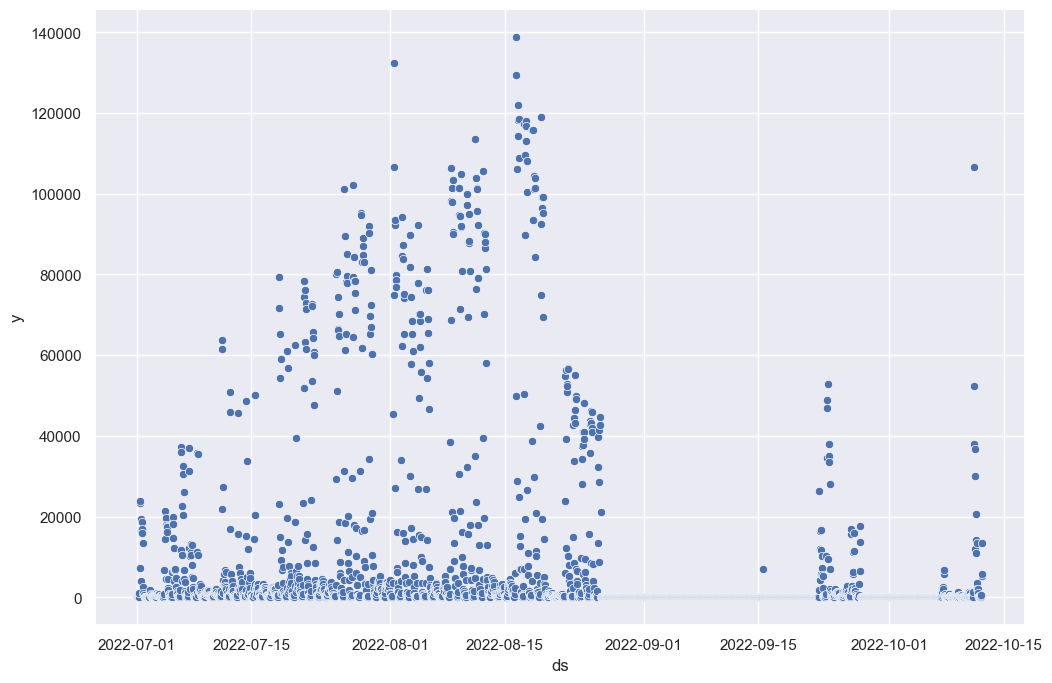

In [18]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x=df['ds'], y=df['y'])

> ##### 7월 8월 한정 #####

In [26]:
from dateutil.parser import *

until_date = parse('2022-09-01')
df = df.loc[ df.ds < until_date, ]
df

ds    y  floor
0    2022-07-01 00:00:00  196      0
1    2022-07-01 01:00:00   60      0
2    2022-07-01 02:00:00   19      0
3    2022-07-01 03:00:00   87      0
4    2022-07-01 04:00:00    9      0
...                  ...  ...    ...
1483 2022-08-31 19:00:00    0      0
1484 2022-08-31 20:00:00    0      0
1485 2022-08-31 21:00:00    0      0
1486 2022-08-31 22:00:00    0      0
1487 2022-08-31 23:00:00    0      0

[1488 rows x 3 columns]

> ##### prepared data before '2022-08-27' #####

In [53]:
df.loc[ df.ds > parse('2022-08-27'), ]

ds  y  floor
1369 2022-08-27 01:00:00  0      0
1370 2022-08-27 02:00:00  0      0
1371 2022-08-27 03:00:00  0      0
1372 2022-08-27 04:00:00  0      0
1373 2022-08-27 05:00:00  0      0
...                  ... ..    ...
1483 2022-08-31 19:00:00  0      0
1484 2022-08-31 20:00:00  0      0
1485 2022-08-31 21:00:00  0      0
1486 2022-08-31 22:00:00  0      0
1487 2022-08-31 23:00:00  0      0

[119 rows x 3 columns]

In [54]:
df = df.loc[ df.ds < parse('2022-08-27'), ]
df

ds    y  floor
0    2022-07-01 00:00:00  196      0
1    2022-07-01 01:00:00   60      0
2    2022-07-01 02:00:00   19      0
3    2022-07-01 03:00:00   87      0
4    2022-07-01 04:00:00    9      0
...                  ...  ...    ...
1363 2022-08-26 19:00:00    0      0
1364 2022-08-26 20:00:00    0      0
1365 2022-08-26 21:00:00    0      0
1366 2022-08-26 22:00:00    0      0
1367 2022-08-26 23:00:00    0      0

[1368 rows x 3 columns]

> ##### draw figure 1. #####

<Axes: xlabel='ds', ylabel='y'>

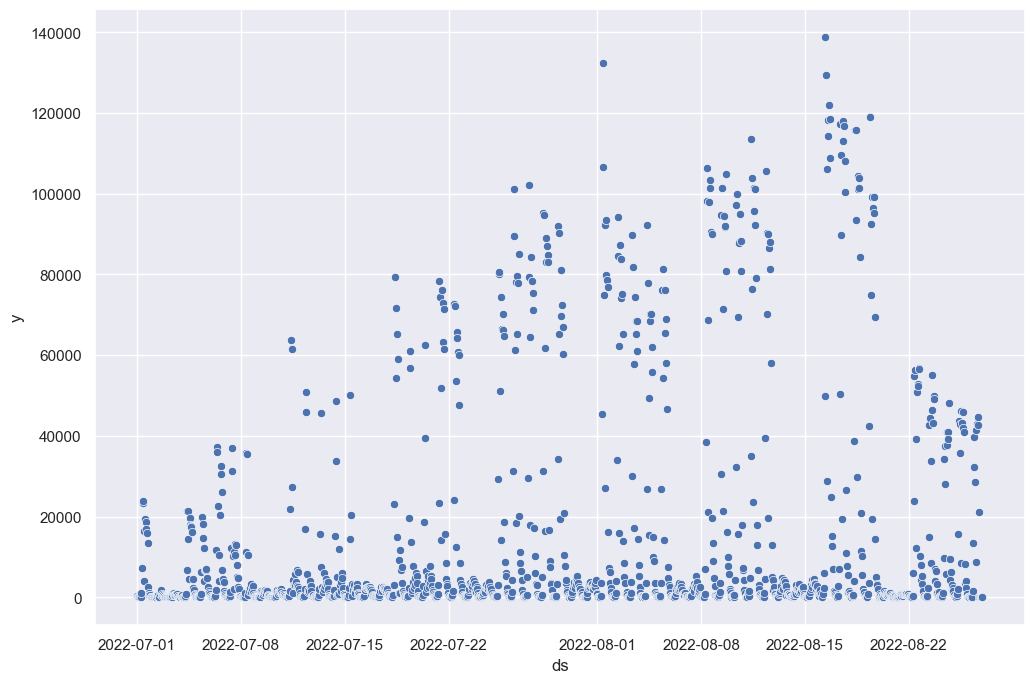

In [55]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x=df['ds'], y=df['y'])

In [56]:
# lower limit
df['floor']=0

In [57]:
m = Prophet(
    # growth='linear',
    # changepoint_range=0.95
    )
m.fit(df)

18:02:20 - cmdstanpy - INFO - Chain [1] start processing
18:02:20 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
df.shape

(1368, 3)

In [59]:
df.loc[df.y <= 0,]

ds  y  floor
26   2022-07-02 02:00:00  0      0
27   2022-07-02 03:00:00  0      0
28   2022-07-02 04:00:00  0      0
36   2022-07-02 12:00:00  0      0
75   2022-07-04 03:00:00  0      0
604  2022-07-26 04:00:00  0      0
627  2022-07-27 03:00:00  0      0
651  2022-07-28 03:00:00  0      0
724  2022-07-31 04:00:00  0      0
819  2022-08-04 03:00:00  0      0
866  2022-08-06 02:00:00  0      0
869  2022-08-06 05:00:00  0      0
893  2022-08-07 05:00:00  0      0
915  2022-08-08 03:00:00  0      0
1011 2022-08-12 03:00:00  0      0
1057 2022-08-14 01:00:00  0      0
1083 2022-08-15 03:00:00  0      0
1084 2022-08-15 04:00:00  0      0
1225 2022-08-21 01:00:00  0      0
1227 2022-08-21 03:00:00  0      0
1228 2022-08-21 04:00:00  0      0
1229 2022-08-21 05:00:00  0      0
1250 2022-08-22 02:00:00  0      0
1275 2022-08-23 03:00:00  0      0
1276 2022-08-23 04:00:00  0      0
1277 2022-08-23 05:00:00  0      0
1299 2022-08-24 03:00:00  0      0
1324 2022-08-25 04:00:00  0      0
1345 2022-08-26 01:00:00  0      0
1349 2022-08-26 05:00:00  0      0
1362 2022-08-26 18:00:00  0      0
1363 2022-08-26 19:00:00  0      0
1364 2022-08-26 20:00:00  0      0
1365 2022-08-26 21:00:00  0      0
1366 2022-08-26 22:00:00  0      0
1367 2022-08-26 23:00:00  0      0

In [60]:
future = m.make_future_dataframe(periods=14)

In [61]:
# lower limit

future['floor']=0
future

ds  floor
0    2022-07-01 00:00:00      0
1    2022-07-01 01:00:00      0
2    2022-07-01 02:00:00      0
3    2022-07-01 03:00:00      0
4    2022-07-01 04:00:00      0
...                  ...    ...
1377 2022-09-05 23:00:00      0
1378 2022-09-06 23:00:00      0
1379 2022-09-07 23:00:00      0
1380 2022-09-08 23:00:00      0
1381 2022-09-09 23:00:00      0

[1382 rows x 2 columns]

In [62]:
# 65 만여건 time series 데이터를 예측하는데 시간이 너무 많이 걸림 
forecast = m.predict(future)
forecast

ds        trend    yhat_lower    yhat_upper  \
0    2022-07-01 00:00:00  3120.257327 -32127.417700  20413.628777   
1    2022-07-01 01:00:00  3136.372006 -34298.534200  18405.821549   
2    2022-07-01 02:00:00  3152.486685 -29906.571747  24577.826608   
3    2022-07-01 03:00:00  3168.601364 -25508.825010  23646.802695   
4    2022-07-01 04:00:00  3184.716043 -30945.002927  20682.585470   
...                  ...          ...           ...           ...   
1377 2022-09-05 23:00:00  7562.196817 -27128.357089  25533.655971   
1378 2022-09-06 23:00:00  6899.384311 -28110.499730  20798.611626   
1379 2022-09-07 23:00:00  6236.571805 -28732.596553  22623.281612   
1380 2022-09-08 23:00:00  5573.759298 -27338.256538  26371.463545   
1381 2022-09-09 23:00:00  4910.946792 -39984.332910  11919.190892   

      trend_lower  trend_upper  additive_terms  additive_terms_lower  \
0     3120.257327  3120.257327    -9955.876599          -9955.876599   
1     3136.372006  3136.372006    -9047.341344          -9047.341344   
2     3152.486685  3152.486685    -5111.449911          -5111.449911   
3     3168.601364  3168.601364    -3565.061943          -3565.061943   
4     3184.716043  3184.716043    -7482.151400          -7482.151400   
...           ...          ...             ...                   ...   
1377  6295.892522  9118.795984    -8214.253101          -8214.253101   
1378  5423.752515  8731.116077    -9251.846433          -9251.846433   
1379  4571.444534  8262.869754    -8789.505801          -8789.505801   
1380  3642.593003  7877.934848    -6494.123311          -6494.123311   
1381  2672.201987  7433.604060   -17367.644835         -17367.644835   

      additive_terms_upper         daily   daily_lower   daily_upper  \
0             -9955.876599 -18226.773404 -18226.773404 -18226.773404   
1             -9047.341344 -17233.752817 -17233.752817 -17233.752817   
2             -5111.449911 -13183.814363 -13183.814363 -13183.814363   
3             -3565.061943 -11492.102474 -11492.102474 -11492.102474   
4             -7482.151400 -15230.991947 -15230.991947 -15230.991947   
...                    ...           ...           ...           ...   
1377          -8214.253101 -14821.753987 -14821.753987 -14821.753987   
1378          -9251.846433 -14821.753987 -14821.753987 -14821.753987   
1379          -8789.505801 -14821.753988 -14821.753988 -14821.753988   
1380          -6494.123311 -14821.753987 -14821.753987 -14821.753987   
1381         -17367.644835 -14821.753987 -14821.753987 -14821.753987   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     8270.896805   8270.896805   8270.896805                   0.0   
1     8186.411473   8186.411473   8186.411473                   0.0   
2     8072.364452   8072.364452   8072.364452                   0.0   
3     7927.040530   7927.040530   7927.040530                   0.0   
4     7748.840547   7748.840547   7748.840547                   0.0   
...           ...           ...           ...                   ...   
1377  6607.500886   6607.500886   6607.500886                   0.0   
1378  5569.907554   5569.907554   5569.907554                   0.0   
1379  6032.248187   6032.248187   6032.248187                   0.0   
1380  8327.630677   8327.630677   8327.630677                   0.0   
1381 -2545.890847  -2545.890847  -2545.890847                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  -6835.619272  
1                            0.0                         0.0  -5910.969338  
2                            0.0                         0.0  -1958.963226  
3                            0.0                         0.0   -396.460580  
4                            0.0                         0.0  -4297.435357  
...                          ...                         ...           ...  
1377                         0.0                         0.0   -652.056

In [63]:
forecast.shape

(1382, 19)

y          yhat    yhat_lower    yhat_upper
ds                                                                  
2022-07-01 00:00:00  196.0  -6835.619272 -32127.417700  20413.628777
2022-07-01 01:00:00   60.0  -5910.969338 -34298.534200  18405.821549
2022-07-01 02:00:00   19.0  -1958.963226 -29906.571747  24577.826608
2022-07-01 03:00:00   87.0   -396.460580 -25508.825010  23646.802695
2022-07-01 04:00:00    9.0  -4297.435357 -30945.002927  20682.585470
...                    ...           ...           ...           ...
2022-09-05 23:00:00    NaN   -652.056284 -27128.357089  25533.655971
2022-09-06 23:00:00    NaN  -2352.462122 -28110.499730  20798.611626
2022-09-07 23:00:00    NaN  -2552.933996 -28732.596553  22623.281612
2022-09-08 23:00:00    NaN   -920.364012 -27338.256538  26371.463545
2022-09-09 23:00:00    NaN -12456.698043 -39984.332910  11919.190892

[1382 rows x 4 columns]

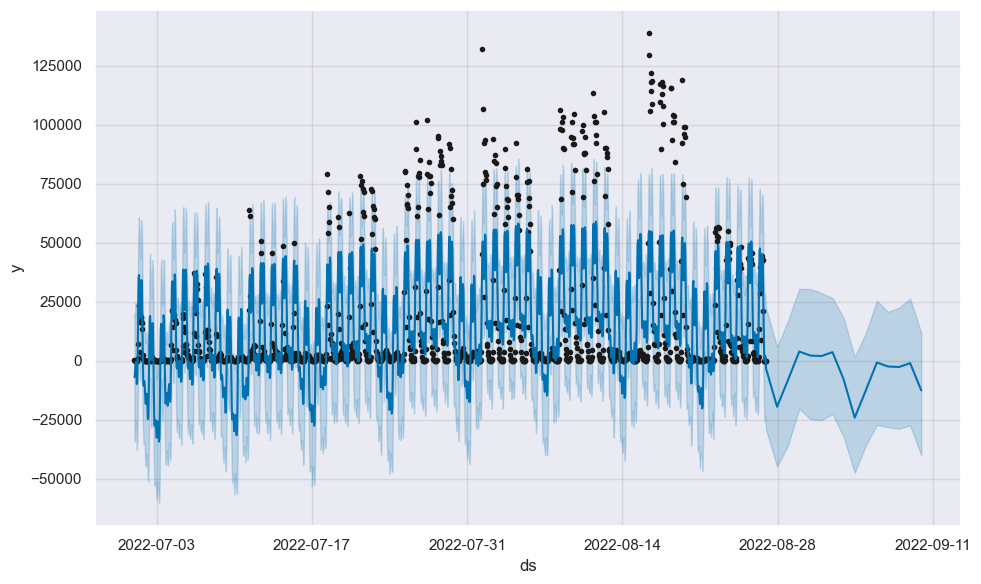

In [64]:
result = pd.concat([df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(forecast)
result

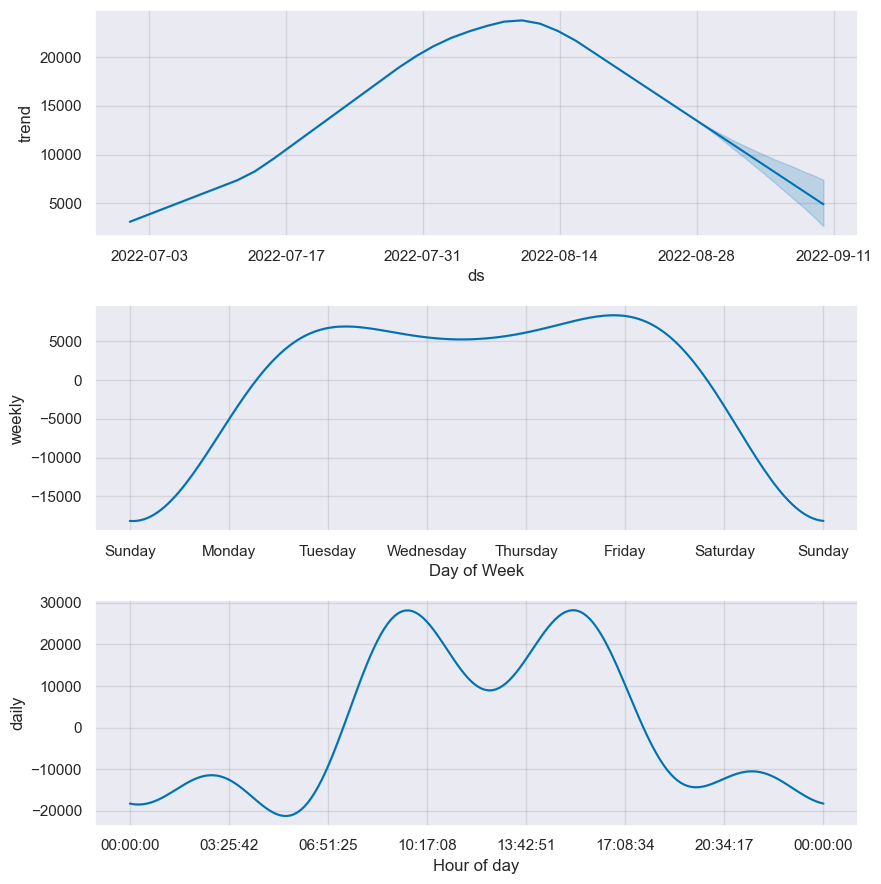

In [65]:
comp = m.plot_components(forecast)

In [66]:
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [42]:
result[result['error'].abs() > 1.5*result['uncertainty']]

y          yhat    yhat_lower    yhat_upper  \
ds                                                                        
2022-08-01 09:00:00  132314.0  45313.471493  18665.943843  70428.733334   
2022-08-16 09:00:00  138770.0  52679.007044  26612.352933  78460.442218   
2022-08-16 10:00:00  129450.0  54025.282740  29678.024726  79555.172952   
2022-08-16 13:00:00  114220.0  38531.300818  14340.341060  63554.389450   

                            error   uncertainty  
ds                                               
2022-08-01 09:00:00  87000.528507  51762.789491  
2022-08-16 09:00:00  86090.992956  51848.089285  
2022-08-16 10:00:00  75424.717260  49877.148227  
2022-08-16 13:00:00  75688.699182  49214.048390

In [67]:
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)
#result['anomaly'] = np.where(np.abs(x['error']) > 1.5*x['uncertainty']), 'Yes', 'No') #Alternate way

> ##### draw anomal graph

In [68]:
result.reset_index()

ds      y          yhat    yhat_lower    yhat_upper  \
0    2022-07-01 00:00:00  196.0  -6835.619272 -32127.417700  20413.628777   
1    2022-07-01 01:00:00   60.0  -5910.969338 -34298.534200  18405.821549   
2    2022-07-01 02:00:00   19.0  -1958.963226 -29906.571747  24577.826608   
3    2022-07-01 03:00:00   87.0   -396.460580 -25508.825010  23646.802695   
4    2022-07-01 04:00:00    9.0  -4297.435357 -30945.002927  20682.585470   
...                  ...    ...           ...           ...           ...   
1377 2022-09-05 23:00:00    NaN   -652.056284 -27128.357089  25533.655971   
1378 2022-09-06 23:00:00    NaN  -2352.462122 -28110.499730  20798.611626   
1379 2022-09-07 23:00:00    NaN  -2552.933996 -28732.596553  22623.281612   
1380 2022-09-08 23:00:00    NaN   -920.364012 -27338.256538  26371.463545   
1381 2022-09-09 23:00:00    NaN -12456.698043 -39984.332910  11919.190892   

            error   uncertainty anomaly  
0     7031.619272  52541.046477      No  
1     5970.969338  52704.355750      No  
2     1977.963226  54484.398355      No  
3      483.460580  49155.627705      No  
4     4306.435357  51627.588396      No  
...           ...           ...     ...  
1377          NaN  52662.013060      No  
1378          NaN  48909.111356      No  
1379          NaN  51355.878165      No  
1380          NaN  53709.720083      No  
1381          NaN  51903.523802      No  

[1382 rows x 8 columns]

In [45]:
import plotly.express as px

fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly')

fig.show()

In [46]:
anomaly_data = result.loc[result.anomaly == 'Yes',]

print( f'Anomaly data shape : {anomaly_data.shape}' )
anomaly_data

Anomaly data shape : (4, 7)


y          yhat    yhat_lower    yhat_upper  \
ds                                                                        
2022-08-01 09:00:00  132314.0  45313.471493  18665.943843  70428.733334   
2022-08-16 09:00:00  138770.0  52679.007044  26612.352933  78460.442218   
2022-08-16 10:00:00  129450.0  54025.282740  29678.024726  79555.172952   
2022-08-16 13:00:00  114220.0  38531.300818  14340.341060  63554.389450   

                            error   uncertainty anomaly  
ds                                                       
2022-08-01 09:00:00  87000.528507  51762.789491     Yes  
2022-08-16 09:00:00  86090.992956  51848.089285     Yes  
2022-08-16 10:00:00  75424.717260  49877.148227     Yes  
2022-08-16 13:00:00  75688.699182  49214.048390     Yes

> ##### make model and run #####

In [128]:
import seaborn as sns
import plotly.express as px

def make_model_and_run( data, period: str ):
    until_date = parse('2022-08-27')
    data = data.loc[ data.datetime < until_date, ]
    
    tick_period_data = data.set_index('datetime')
    tick_period_data = tick_period_data.emp_user_id.resample( period ).count()
    
    df = pd.DataFrame( data=tick_period_data )
    df = df.reset_index()
    
    df = df[['datetime', 'emp_user_id']]
    df.columns = ['ds', 'y']
    
    df = df.loc[ df.y > 0, ]
    
    sns.set(rc={'figure.figsize':(12,8)})
    sns.scatterplot(x=df['ds'], y=df['y'])
    
    # lower limit
    # df['floor']=0
    
    m = Prophet(
    # growth='linear',
    # changepoint_range=0.95
    )
    m.fit(df)
    
    future = m.make_future_dataframe(periods=14)
    # future['floor']=0
    
    # 65 만여건 time series 데이터를 예측하는데 시간이 너무 많이 걸림 
    forecast = m.predict(future)
    
    result = pd.concat([df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
    fig1 = m.plot(forecast)
    
    comp = m.plot_components(forecast)
    
    result['error'] = result['y'] - result['yhat']
    result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']
    
    result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)
    
    result.reset_index()
    
    fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title=f'{period} tick graph')
    fig.show()
    
    anomaly_data = result.loc[result.anomaly == 'Yes',]

    print( f'Anomaly data shape : {anomaly_data.shape}' )
    print( anomaly_data )
    
    

19:09:11 - cmdstanpy - INFO - Chain [1] start processing
19:09:15 - cmdstanpy - INFO - Chain [1] done processing


Anomaly data shape : (58, 7)
                           y         yhat   yhat_lower   yhat_upper  \
ds                                                                    
2022-08-01 08:55:00  11116.0  3564.785217  1502.813124  5649.042921   
2022-08-01 09:00:00  13433.0  3671.147103  1472.676546  5787.518685   
2022-08-01 09:05:00  10661.0  3771.202891  1529.091067  6015.655477   
2022-08-01 09:10:00  10822.0  3864.548020  1680.731629  5960.176336   
2022-08-01 09:15:00  12166.0  3950.818173  1690.735920  6175.483677   
2022-08-01 09:20:00  10836.0  4029.691793  2139.708224  6156.651964   
2022-08-01 09:25:00  11375.0  4100.892314  1798.922253  6273.642227   
2022-08-01 09:30:00  11648.0  4164.190086  1948.987692  6406.128949   
2022-08-01 09:40:00  10990.0  4266.402677  1963.619166  6357.506566   
2022-08-01 13:50:00  10444.0  3222.046200  1013.725946  5462.095919   
2022-08-08 10:25:00  11168.0  4456.479777  2196.289394  6479.753731   
2022-08-08 13:25:00  10016.0  3099.193432  1005.

19:09:27 - cmdstanpy - INFO - Chain [1] start processing
19:09:28 - cmdstanpy - INFO - Chain [1] done processing


Anomaly data shape : (21, 7)
                           y         yhat   yhat_lower    yhat_upper  \
ds                                                                     
2022-08-01 09:00:00  24094.0  7515.701010  2893.987490  11883.227763   
2022-08-01 09:10:00  22988.0  7889.099081  3940.694326  12470.213049   
2022-08-01 09:20:00  22211.0  8204.677526  3654.946911  12819.881846   
2022-08-01 09:30:00  22344.0  8458.027477  3965.121131  13183.974400   
2022-08-16 09:10:00  23830.0  8849.432862  4424.275363  13093.152622   
2022-08-16 09:30:00  25720.0  9377.869747  4963.265417  13768.180755   
2022-08-16 09:50:00  23330.0  9647.894313  5336.263834  14044.139348   
2022-08-16 10:40:00  23460.0  9231.305875  4920.377841  13445.514374   
2022-08-16 10:50:00  25170.0  8997.405207  4770.023894  13448.429351   
2022-08-16 11:00:00  21890.0  8730.683106  4367.556913  13006.193227   
2022-08-16 11:10:00  25390.0  8440.384393  4015.198849  12807.316409   
2022-08-16 13:10:00  22000.0  6333.

19:09:39 - cmdstanpy - INFO - Chain [1] start processing
19:09:39 - cmdstanpy - INFO - Chain [1] done processing


Anomaly data shape : (8, 7)
                           y          yhat    yhat_lower    yhat_upper  \
ds                                                                       
2022-08-01 09:00:00  69293.0  23470.205781  10072.700674  36800.552437   
2022-08-16 09:00:00  68600.0  26051.680848  13195.764625  39191.576461   
2022-08-16 09:30:00  70170.0  28129.682888  15350.713168  41315.380729   
2022-08-16 10:30:00  71390.0  27184.861278  14923.571067  40128.979362   
2022-08-16 11:00:00  69080.0  24822.847721  11789.335542  37930.949388   
2022-08-16 13:30:00  60200.0  19955.474557   6877.710538  33491.638014   
2022-08-16 14:00:00  61930.0  22285.210566   9520.535328  35587.063315   
2022-08-17 13:00:00  57600.0  17592.807867   4948.781255  31197.902247   

                            error   uncertainty anomaly  
ds                                                       
2022-08-01 09:00:00  45822.794219  26727.851763     Yes  
2022-08-16 09:00:00  42548.319152  25995.811836     Yes  

19:09:47 - cmdstanpy - INFO - Chain [1] start processing
19:09:47 - cmdstanpy - INFO - Chain [1] done processing


Anomaly data shape : (2, 7)
                            y          yhat    yhat_lower    yhat_upper  \
ds                                                                        
2022-08-01 09:00:00  132314.0  48636.360663  24583.531205  74518.399924   
2022-08-16 09:00:00  138770.0  53381.680987  27597.687642  79677.123001   

                            error   uncertainty anomaly  
ds                                                       
2022-08-01 09:00:00  83677.639337  49934.868719     Yes  
2022-08-16 09:00:00  85388.319013  52079.435359     Yes  


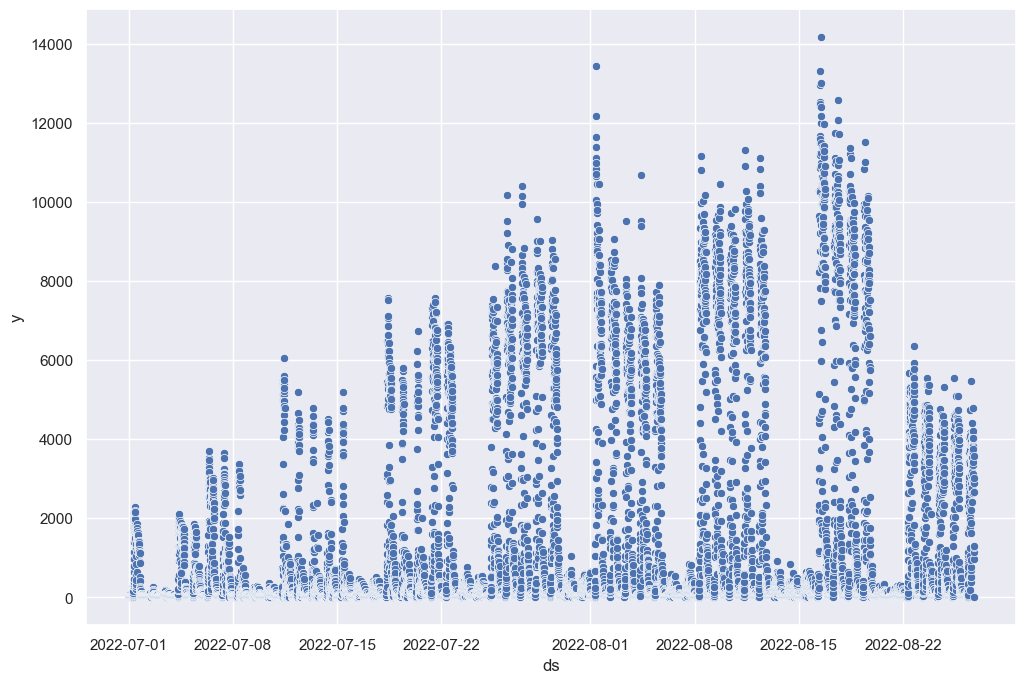

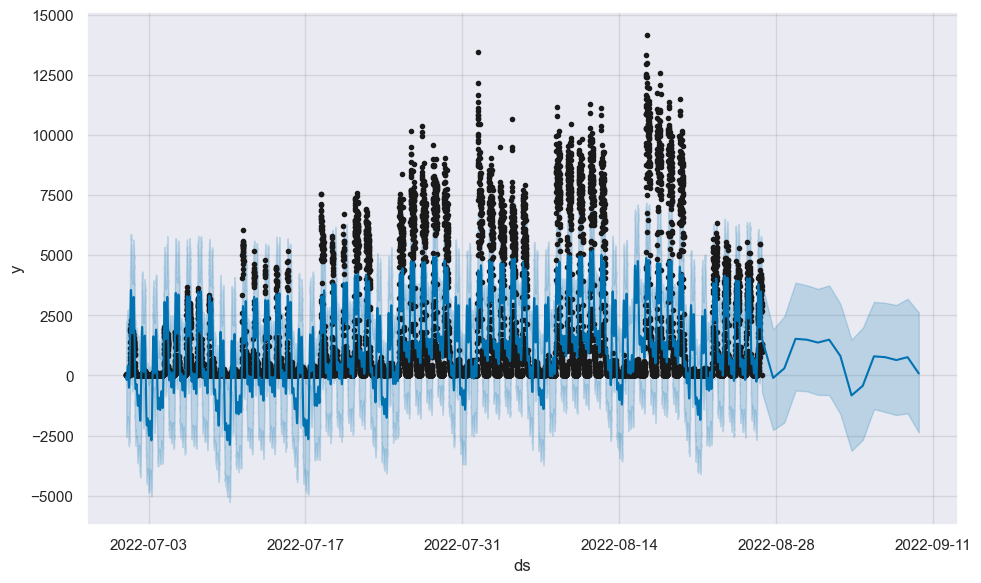

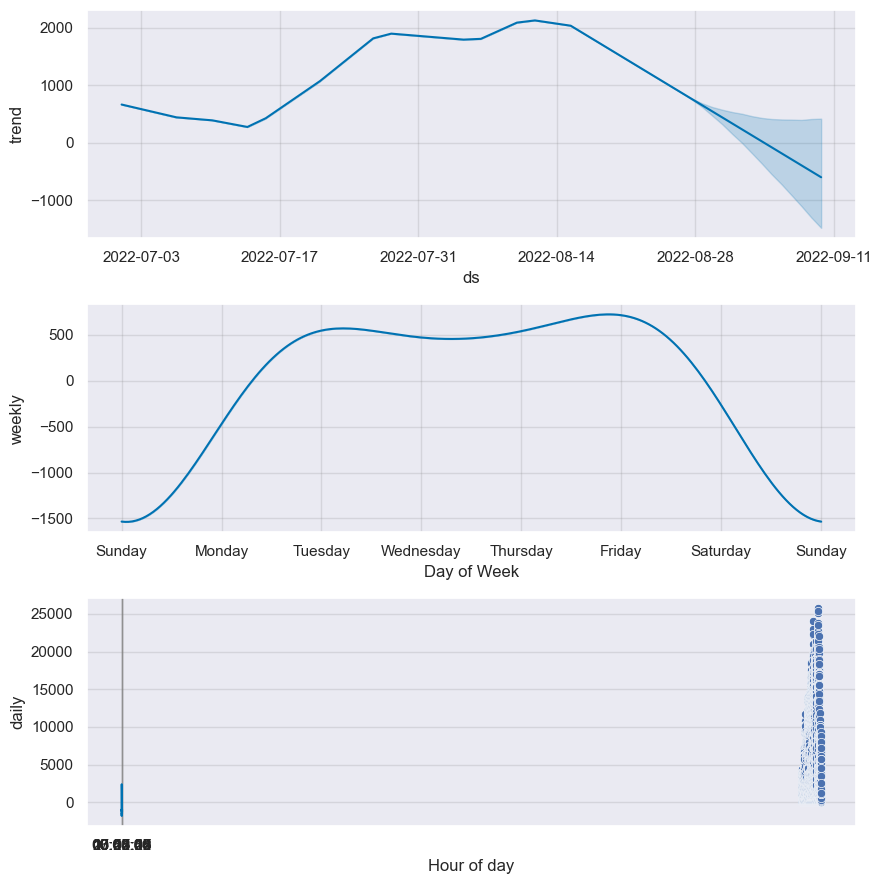

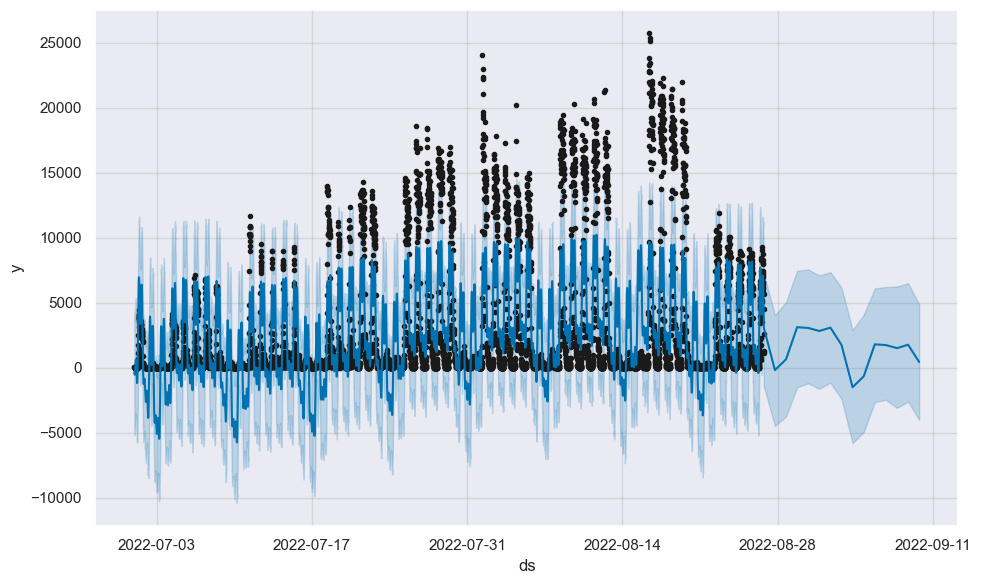

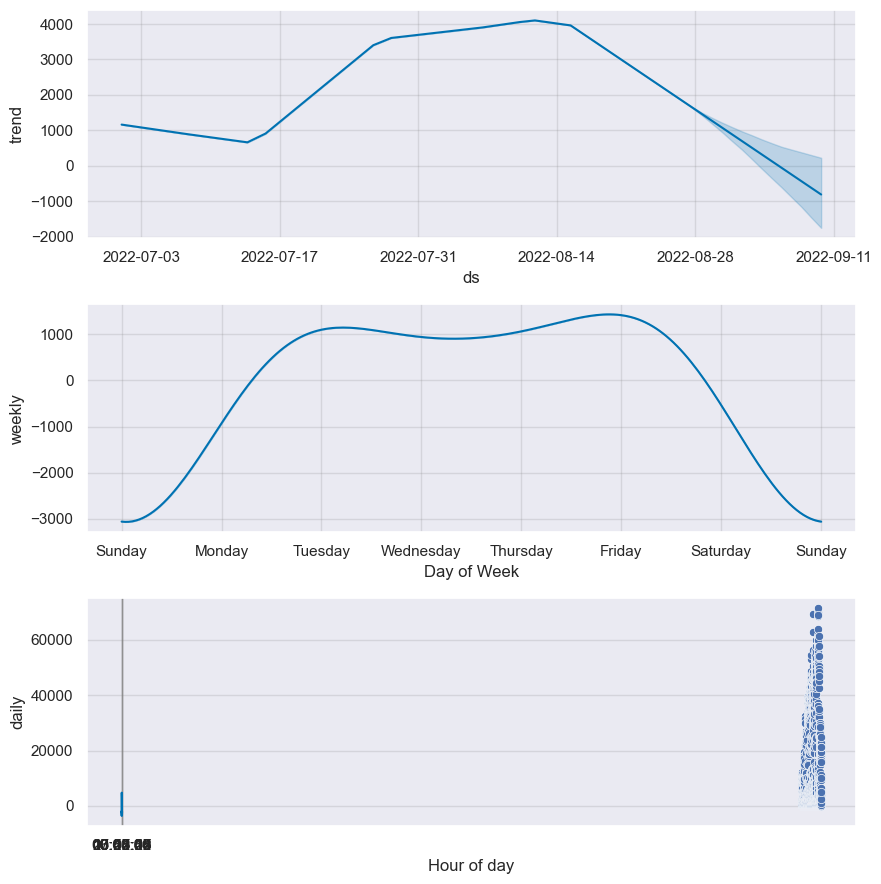

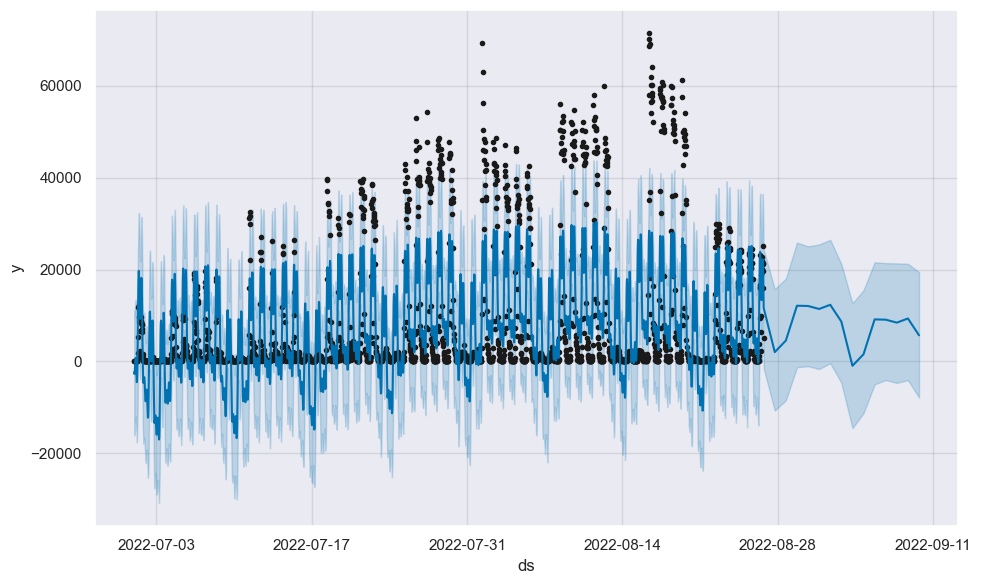

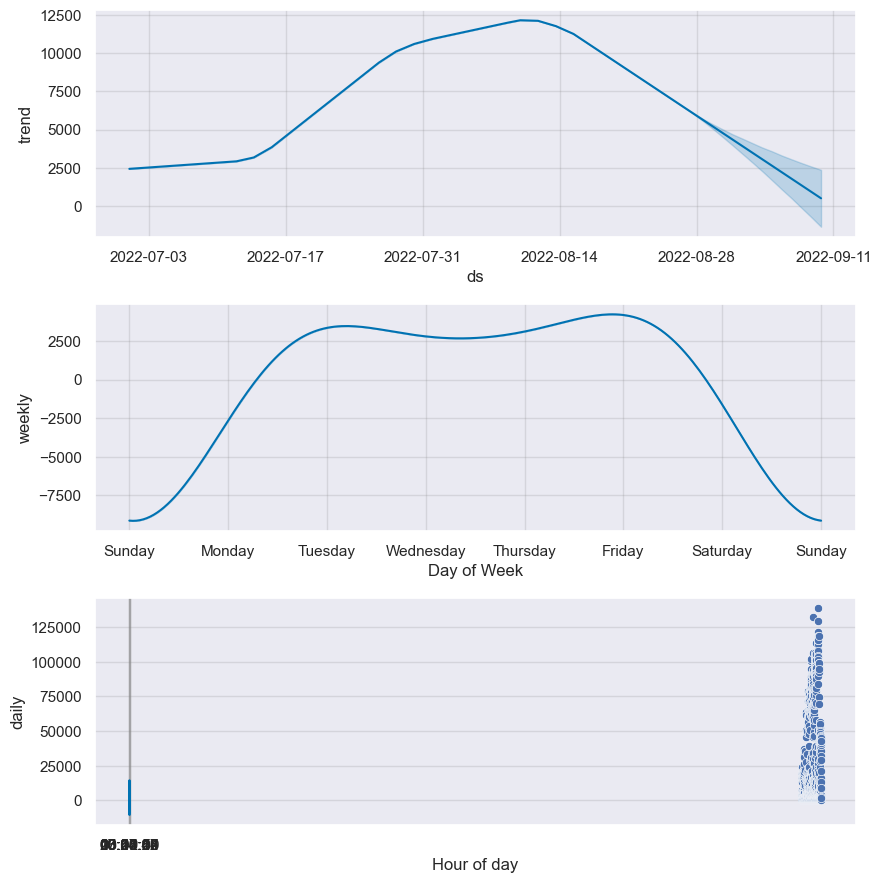

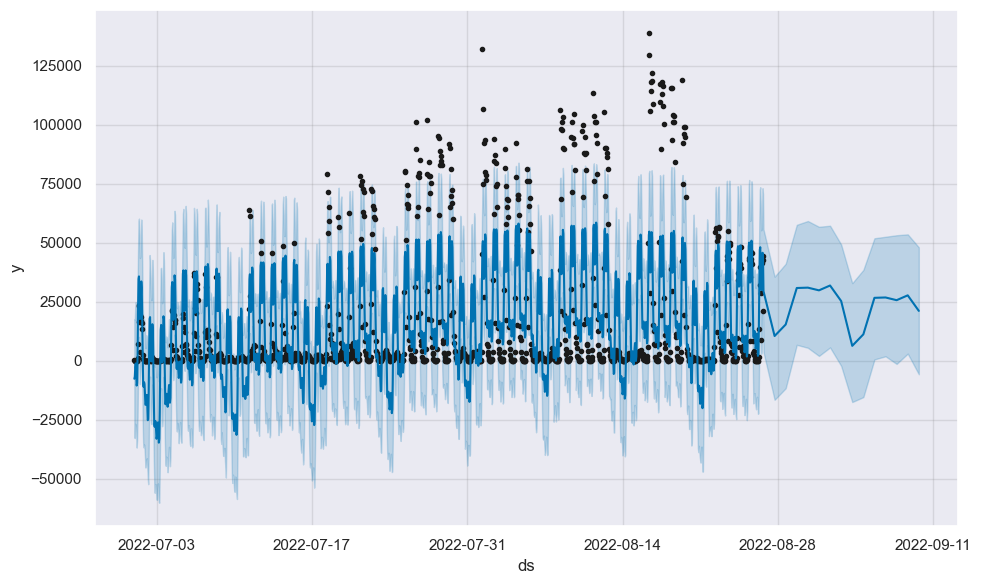

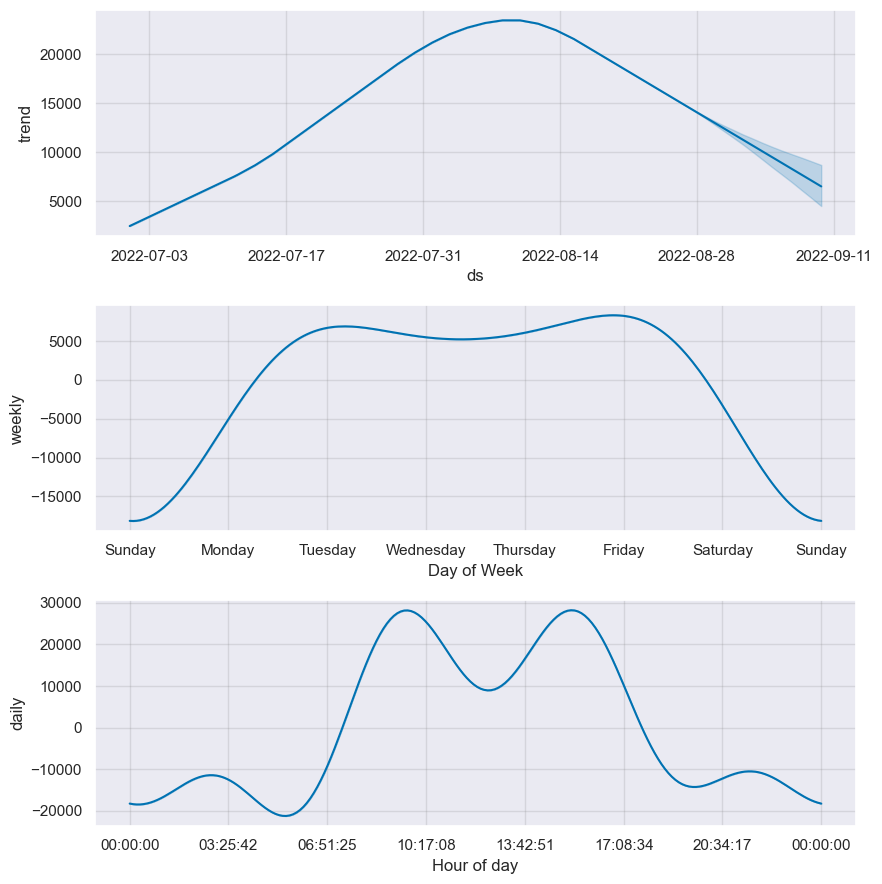

In [77]:
tick_list = [
    '5T',   #  5 min
    '10T',  # 10 min
    '30T',  # 30 min
    '1H'    #  1 hour
 ]

for period in tick_list:
    make_model_and_run( data, period )

> ##### user_group #####

In [115]:
top_5_users_dict = dict(data.groupby('emp_user_id').user_ip.count().sort_values( ascending=False ).head().items())
top_5_users = data.groupby('emp_user_id').user_ip.count().sort_values( ascending=False ).head().items
top_5_users

<bound method Series.items of emp_user_id
BS0575        1017779
19119218       335295
MINJIMOMMY     215093
CAFUCHI        193810
5882           192917
Name: user_ip, dtype: int64>

In [119]:
for user, count in top_5_users_dict.items():
    print( f'{user} : {count}')

BS0575 : 1017779
19119218 : 335295
MINJIMOMMY : 215093
CAFUCHI : 193810
5882 : 192917


In [120]:
best_user = data.loc[ data.emp_user_id == 'BS0575',]
best_user

emp_user_id         user_ip req_type  system_seq  \
2666         BS0575  222.108.82.169       RD           4   
2756         BS0575  222.108.82.169       RD           4   
2757         BS0575  222.108.82.169       RD           4   
2912         BS0575  222.108.82.169       RD           4   
2916         BS0575  222.108.82.169       RD           4   
...             ...             ...      ...         ...   
1088113      BS0575   118.41.147.92       RD          12   
1088114      BS0575   118.41.147.92       RD          12   
1097373      BS0575   118.41.147.92       RD          12   
1097375      BS0575   118.41.147.92       RD          12   
1097377      BS0575   118.41.147.92       RD          12   

                                                   req_url    req_end_time  \
2666     https://www.fms.or.kr/com/redirectEx.do?reqUrl...  20220701075518   
2756                 https://www.fms.or.kr/com/mainForm.do  20220701080300   
2757     https://www.fms.or.kr/com/redirectEx.do?reqUrl...  20220701080301   
2912     https://www.fms.or.kr/com/redirectEx.do?reqUrl...  20220701075446   
2916     https://www.fms.or.kr/com/redirectEx.do?reqUrl...  20220701075449   
...                                                    ...             ...   
1088113  https://www.jis.go.kr/evaluate/eva30001_list.d...  20220926073140   
1088114  https://www.jis.go.kr/evaluate/eva30001_select...  20220926073144   
1097373  https://www.jis.go.kr/mainForm.do?user_id=bs05...  20220927093604   
1097375  https://www.jis.go.kr/redirect.do?reqUrl=/intr...  20220927093608   
1097377  https://www.jis.go.kr/evaluate/eva30001_list.d...  20220927093610   

        result_type            datetime  
2666              6 2022-07-01 07:55:18  
2756              6 2022-07-01 08:03:00  
2757              6 2022-07-01 08:03:01  
2912              6 2022-07-01 07:54:46  
2916              6 2022-07-01 07:54:49  
...             ...                 ...  
1088113         6,6 2022-09-26 07:31:40  
1088114   7,8,6,6,6 2022-09-26 07:31:44  
1097373     6,6,6,6 2022-09-27 09:36:04  
1097375         6,6 2022-09-27 09:36:08  
1097377         6,6 2022-09-27 09:36:10  

[1017779 rows x 8 columns]

In [122]:
top_5_users_data_dict = dict()
for user, count in top_5_users_dict.items():
    top_5_users_data_dict.update( { user : data.loc[ data.emp_user_id == user,] })

top_5_users_data_dict.keys()

dict_keys(['BS0575', '19119218', 'MINJIMOMMY', 'CAFUCHI', '5882'])

In [105]:
tick_list

['5T', '10T', '30T', '1H']

20:26:31 - cmdstanpy - INFO - Chain [1] start processing
20:26:31 - cmdstanpy - INFO - Chain [1] done processing


Anomaly data shape : (4, 7)
                          y         yhat   yhat_lower   yhat_upper  \
ds                                                                   
2022-07-28 09:00:00  6258.0  2156.388173  1297.293713  3120.723739   
2022-07-28 10:00:00  5304.0  1968.085062  1100.035557  2812.522026   
2022-07-28 11:00:00  4320.0  1528.443483   620.797289  2460.034652   
2022-07-29 09:00:00  6036.0  2066.690370  1191.597886  2973.003906   

                           error  uncertainty anomaly  
ds                                                     
2022-07-28 09:00:00  4101.611827  1823.430026     Yes  
2022-07-28 10:00:00  3335.914938  1712.486469     Yes  
2022-07-28 11:00:00  2791.556517  1839.237363     Yes  
2022-07-29 09:00:00  3969.309630  1781.406019     Yes  


emp_user_id
datetime                        
2022-07-01 07:00:00            5
2022-07-01 08:00:00          113
2022-07-01 09:00:00          994
2022-07-01 10:00:00          847
2022-07-01 11:00:00         1047
...                          ...
2022-08-19 13:00:00         5160
2022-08-19 14:00:00         7840
2022-08-19 15:00:00         8980
2022-08-19 16:00:00         9360
2022-08-19 17:00:00         3160

[1187 rows x 1 columns]

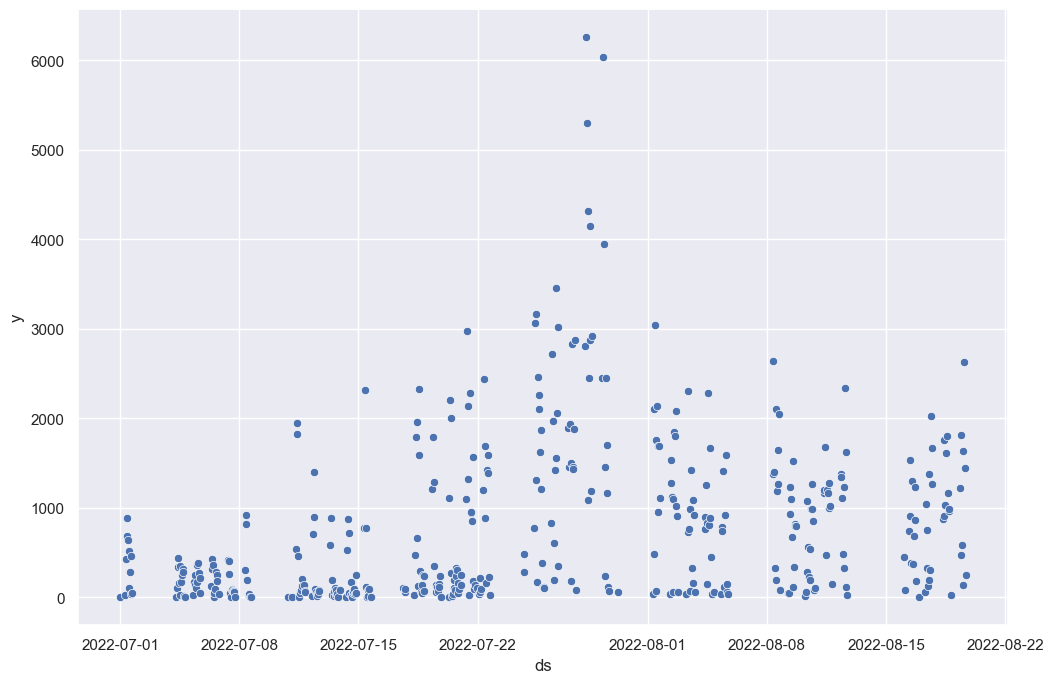

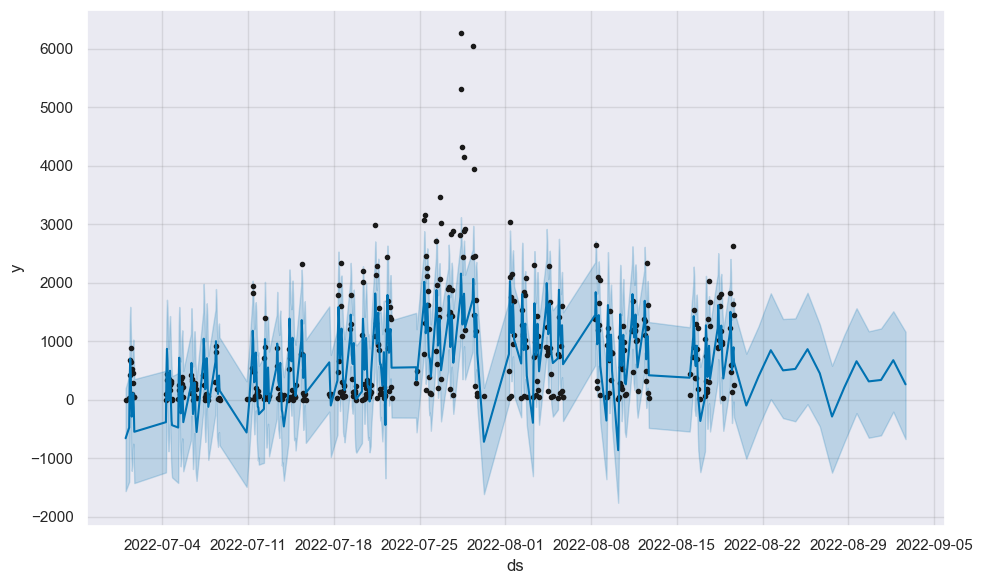

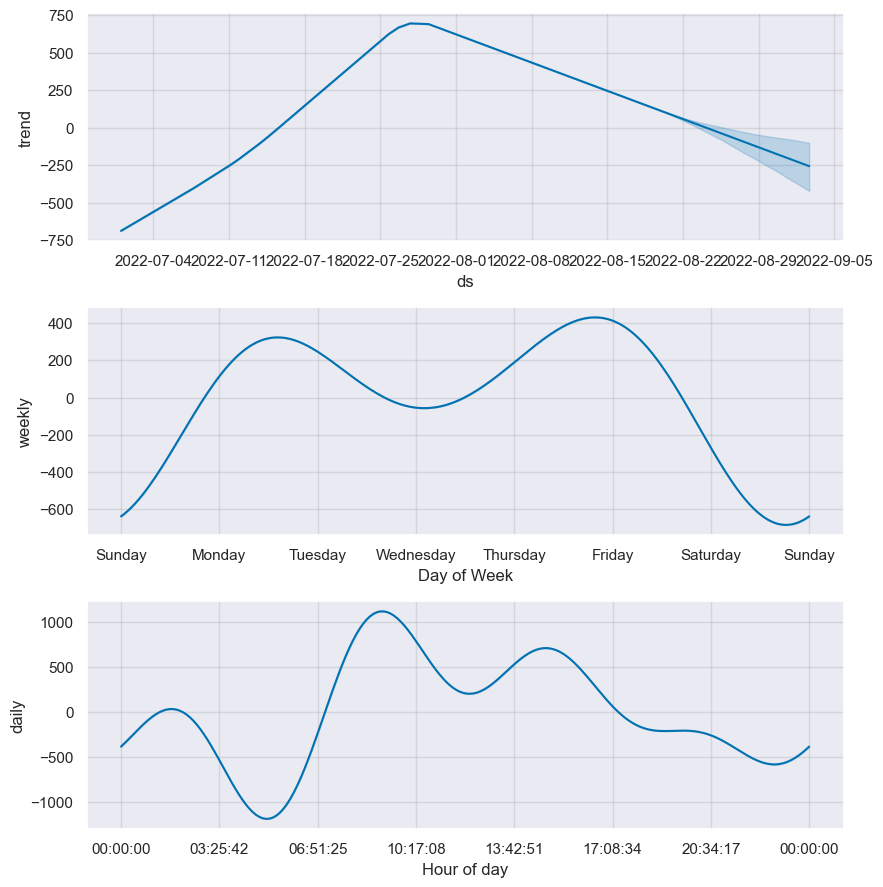

In [129]:
make_model_and_run( top_5_users_data_dict.get( '19119218' ), tick_list[-1] )


df_user

> ##### `2022-07-27 09:00:00` -> wed

In [ ]:
filename = '../data/prophet_202207_model.pkl'

## Load pickle
with open( filename,"wb") as fw:
    pickle.dump(m, fw)

In [10]:
import pandas as pd
import numpy as np

from prophet import Prophet

import pickle

import warnings
warnings.filterwarnings('ignore')

In [11]:
filename = '../data/prophet_202207_model.pkl'

global fcast

## Load pickle
with open( filename,"rb") as fr:
    fcast_202207_model = pd.read_pickle(filename)

In [28]:
new_future = fcast_202207_model.make_future_dataframe(periods=1)
new_future

ds
0      2022-07-01 00:00:17
1      2022-07-01 00:00:23
2      2022-07-01 00:00:36
3      2022-07-01 00:01:17
4      2022-07-01 00:01:21
...                    ...
517865 2022-07-31 23:59:11
517866 2022-07-31 23:59:18
517867 2022-07-31 23:59:31
517868 2022-07-31 23:59:41
517869 2022-08-01 23:59:41

[517870 rows x 1 columns]

In [29]:
new_fcast = fcast_202207_model.predict(new_future)
new_fcast

ds     trend  yhat_lower  yhat_upper  trend_lower  \
0      2022-07-01 00:00:17  0.516982   -1.719459    2.384447     0.516982   
1      2022-07-01 00:00:23  0.516996   -1.662598    2.269935     0.516996   
2      2022-07-01 00:00:36  0.517026   -1.431468    2.322522     0.517026   
3      2022-07-01 00:01:17  0.517121   -1.511607    2.287557     0.517121   
4      2022-07-01 00:01:21  0.517130   -1.534162    2.290910     0.517130   
...                    ...       ...         ...         ...          ...   
517865 2022-07-31 23:59:11  1.497300   -1.070874    2.881321     1.497300   
517866 2022-07-31 23:59:18  1.497280   -1.095680    2.882850     1.497280   
517867 2022-07-31 23:59:31  1.497243   -0.887780    2.812838     1.497243   
517868 2022-07-31 23:59:41  1.497215   -1.156314    2.744829     1.497215   
517869 2022-08-01 23:59:41  1.253442   -1.298581    2.633442     1.253442   

        trend_upper  additive_terms  additive_terms_lower  \
0          0.516982       -0.184587             -0.184587   
1          0.516996       -0.184660             -0.184660   
2          0.517026       -0.184817             -0.184817   
3          0.517121       -0.185295             -0.185295   
4          0.517130       -0.185341             -0.185341   
...             ...             ...                   ...   
517865     1.497300       -0.625738             -0.625738   
517866     1.497280       -0.625776             -0.625776   
517867     1.497243       -0.625845             -0.625845   
517868     1.497215       -0.625896             -0.625896   
517869     1.253442       -0.450464             -0.450464   

        additive_terms_upper     daily  daily_lower  daily_upper    weekly  \
0                  -0.184587 -0.541746    -0.541746    -0.541746  0.357159   
1                  -0.184660 -0.541821    -0.541821    -0.541821  0.357161   
2                  -0.184817 -0.541982    -0.541982    -0.541982  0.357165   
3                  -0.185295 -0.542474    -0.542474    -0.542474  0.357179   
4                  -0.185341 -0.542521    -0.542521    -0.542521  0.357180   
...                      ...       ...          ...          ...       ...   
517865             -0.625738 -0.540891    -0.540891    -0.540891 -0.084848   
517866             -0.625776 -0.540984    -0.540984    -0.540984 -0.084792   
517867             -0.625845 -0.541156    -0.541156    -0.541156 -0.084689   
517868             -0.625896 -0.541287    -0.541287    -0.541287 -0.084609   
517869             -0.450464 -0.541287    -0.541287    -0.541287  0.090823   

        weekly_lower  weekly_upper  multiplicative_terms  \
0           0.357159      0.357159                   0.0   
1           0.357161      0.357161                   0.0   
2           0.357165      0.357165                   0.0   
3           0.357179      0.357179                   0.0   
4           0.357180      0.357180                   0.0   
...              ...           ...                   ...   
517865     -0.084848     -0.084848                   0.0   
517866     -0.084792     -0.084792                   0.0   
517867     -0.084689     -0.084689                   0.0   
517868     -0.084609     -0.084609                   0.0   
517869      0.090823      0.090823                   0.0   

        multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                              0.0                         0.0  0.332395  
1                              0.0                         0.0  0.332336  
2                              0.0                         0.0  0.332209  
3                              0.0                         0.0  0.331825  
4                              0.0                         0.0  0.331789  
...                            ...                         ...       ...  
517865                         0.0                         0.0  0.871561  
517866                         0.0                         0.0  0.871504  
517867                         0.

In [59]:
from dateutil.parser import *

date_list = [
    parse('2023-07-01 00:00:17'), # 토요일 새벽 접속
    parse('2023-07-01 15:00:17'), # 토요일 오후 13시 접속
    parse('2023-07-02 00:00:17'), # 일요일 새벽 접속
    parse('2023-07-02 15:00:17'), # 일요일 오후 13시 접속
    parse('2023-07-03 00:00:17'), # 월요일 새벽 접속
    parse('2023-07-03 10:30:17'), # 월요일 오후 12시 30분 { 점심 } 접속
    parse('2023-07-03 12:30:17'), # 월요일 오후 12시 30분 { 점심 } 접속
    parse('2023-07-03 13:30:17'), # 월요일 오후 13시 30분 { 점심 } 접속
    parse('2023-07-03 15:00:17'), # 월요일 오후 3시 접속    
]

test_df = pd.DataFrame( data=date_list, columns=['ds'] )
test_df

ds
0 2023-07-01 00:00:17
1 2023-07-01 15:00:17
2 2023-07-02 00:00:17
3 2023-07-02 15:00:17
4 2023-07-03 00:00:17
5 2023-07-03 10:30:17
6 2023-07-03 12:30:17
7 2023-07-03 13:30:17
8 2023-07-03 15:00:17

In [60]:
test_fcast = fcast_202207_model.predict(test_df)
test_fcast

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2023-07-01 00:00:17 -79.923149  -82.239405  -78.463990   -79.931821   
1 2023-07-01 15:00:17 -80.075507  -81.623342  -77.678408   -80.137806   
2 2023-07-02 00:00:17 -80.166922  -83.198201  -79.247276   -80.309004   
3 2023-07-02 15:00:17 -80.319281  -81.877413  -78.020568   -80.566980   
4 2023-07-03 00:00:17 -80.410696  -83.046690  -79.026009   -80.776215   
5 2023-07-03 10:30:17 -80.517346  -81.500108  -77.709535   -81.013049   
6 2023-07-03 12:30:17 -80.537661  -82.099287  -77.976183   -81.208463   
7 2023-07-03 13:30:17 -80.547818  -82.510510  -77.921696   -81.449765   
8 2023-07-03 15:00:17 -80.563054  -81.970027  -77.295199   -81.666108   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -79.908063       -0.461268             -0.461268             -0.461268   
1   -80.011596        0.385456              0.385456              0.385456   
2   -80.017252       -1.073967             -1.073967             -1.073967   
3   -80.065349        0.408957              0.408957              0.408957   
4   -80.019763       -0.626069             -0.626069             -0.626069   
5   -79.988880        0.968580              0.968580              0.968580   
6   -79.830368        0.464589              0.464589              0.464589   
7   -79.666291        0.506174              0.506174              0.506174   
8   -79.517990        0.918071              0.918071              0.918071   

      daily  daily_lower  daily_upper    weekly  weekly_lower  weekly_upper  \
0 -0.541746    -0.541746    -0.541746  0.080479      0.080479      0.080479   
1  0.759499     0.759499     0.759499 -0.374044     -0.374044     -0.374044   
2 -0.541746    -0.541746    -0.541746 -0.532221     -0.532221     -0.532221   
3  0.759499     0.759499     0.759499 -0.350542     -0.350542     -0.350542   
4 -0.541746    -0.541746    -0.541746 -0.084322     -0.084322     -0.084322   
5  0.834731     0.834731     0.834731  0.133850      0.133850      0.133850   
6  0.314192     0.314192     0.314192  0.150398      0.150398      0.150398   
7  0.350858     0.350858     0.350858  0.155316      0.155316      0.155316   
8  0.759499     0.759499     0.759499  0.158572      0.158572      0.158572   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   
5                   0.0                         0.0   
6                   0.0                         0.0   
7                   0.0                         0.0   
8                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0 -80.384417  
1                         0.0 -79.690052  
2                         0.0 -81.240890  
3                         0.0 -79.910323  
4                         0.0 -81.036764  
5                         0.0 -79.548766  
6                         0.0 -80.073071  
7                         0.0 -80.041645  
8                         0.0 -79.644983